# Aprendendo a combinar Modelos 

Existem dois tipos de combinação, HARD e SOFT

In [ ]:
# importação dos dados
import pandas as pd
url = 'https://raw.githubusercontent.com/gitflai/DDS4/main/insurance.csv'
dados = pd.read_csv(url)

dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

X = dados[['bmi','charges']]
y = dados['smoker']



## Técnica de Validação

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

validacao = RepeatedKFold(n_splits = 10, n_repeats= 3)



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Regressão Logistica

modelo = LogisticRegression()
medidas = cross_validate(modelo, X, y, cv = validacao, scoring= 'accuracy')
round(medidas['test_score'].mean(), 2)

0.93

In [ ]:
medidas

{'fit_time': array([0.01342368, 0.01103473, 0.01123905, 0.01073718, 0.01081872,
        0.01060486, 0.01184702, 0.01426864, 0.01283956, 0.01141286,
        0.01108766, 0.0114851 , 0.0119431 , 0.01097846, 0.01139665,
        0.01056743, 0.01086354, 0.01063538, 0.01107001, 0.01094508,
        0.01134467, 0.01077127, 0.01162767, 0.01288533, 0.01151967,
        0.01130295, 0.01118183, 0.01109433, 0.01086688, 0.01585031]),
 'score_time': array([0.0017488 , 0.00174284, 0.00171518, 0.00171685, 0.0017426 ,
        0.00165701, 0.00170279, 0.00284266, 0.00179505, 0.00171947,
        0.00169349, 0.00171041, 0.00175977, 0.00164151, 0.0015862 ,
        0.00159669, 0.00158167, 0.00163531, 0.00168371, 0.00215268,
        0.00194454, 0.0016067 , 0.00176096, 0.00174785, 0.0017302 ,
        0.00168586, 0.00167537, 0.00171423, 0.00229979, 0.00172043]),
 'test_score': array([0.94029851, 0.89552239, 0.91791045, 0.93283582, 0.93283582,
        0.94029851, 0.96268657, 0.94029851, 0.93984962, 0.91729323,
    

In [ ]:
# KNN

modelo = KNeighborsClassifier(n_neighbors = 25)
medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
round(medidas['test_score'].mean(), 2)

0.96

In [ ]:
# Arvore de Decisão

modelo = DecisionTreeClassifier(max_depth = 3)
medidas = cross_validate(modelo, X, y, cv = validacao, scoring='accuracy')
round(medidas['test_score'].mean(), 2)

0.96

In [ ]:
# Modelos de Classificao Com 'probabilidade'
# interpretar como propensao a classificacao
modelo = LogisticRegression()
modelo.fit(X,y)
modelo.predict(X)
modelo.predict_proba(X).round(4).tolist()

[[0.8241, 0.1759],
 [0.9997, 0.0003],
 [0.999, 0.001],
 [0.175, 0.825],
 [0.9975, 0.0025],
 [0.9941, 0.0059],
 [0.9972, 0.0028],
 [0.9897, 0.0103],
 [0.9956, 0.0044],
 [0.0533, 0.9467],
 [0.9963, 0.0037],
 [0.0836, 0.9164],
 [0.9997, 0.0003],
 [0.9988, 0.0012],
 [0.1568, 0.8432],
 [0.9956, 0.0044],
 [0.9866, 0.0134],
 [0.9934, 0.0066],
 [0.9991, 0.0009],
 [0.0614, 0.9386],
 [0.9933, 0.0067],
 [0.999, 0.001],
 [0.9998, 0.0002],
 [0.0187, 0.9813],
 [0.9932, 0.0068],
 [0.9178, 0.0822],
 [0.723, 0.277],
 [0.9878, 0.0122],
 [0.9557, 0.0443],
 [0.0455, 0.9545],
 [0.0959, 0.9041],
 [0.9969, 0.0031],
 [0.9964, 0.0036],
 [0.9342, 0.0658],
 [0.0009, 0.9991],
 [0.9866, 0.0134],
 [0.9671, 0.0329],
 [0.9851, 0.0149],
 [0.0364, 0.9636],
 [0.0064, 0.9936],
 [0.9963, 0.0037],
 [0.9996, 0.0004],
 [0.9608, 0.0392],
 [0.9968, 0.0032],
 [0.9995, 0.0005],
 [0.9529, 0.0471],
 [0.9999, 0.0001],
 [0.9996, 0.0004],
 [0.8753, 0.1247],
 [0.0338, 0.9662],
 [0.9998, 0.0002],
 [0.9994, 0.0006],
 [0.3638, 0.6362],
 

In [ ]:
# Combinação por votos HARD

from sklearn.ensemble import VotingClassifier

reglog = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 25)
arvore = DecisionTreeClassifier(max_depth = 3)

modelos = [('Reg. Log.', reglog),
           ('KNN', knn),
           ('Arvore', arvore)]

modelo = VotingClassifier(modelos, voting = 'hard')

medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
round(medidas['test_score'].mean(), 2)

0.96

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names

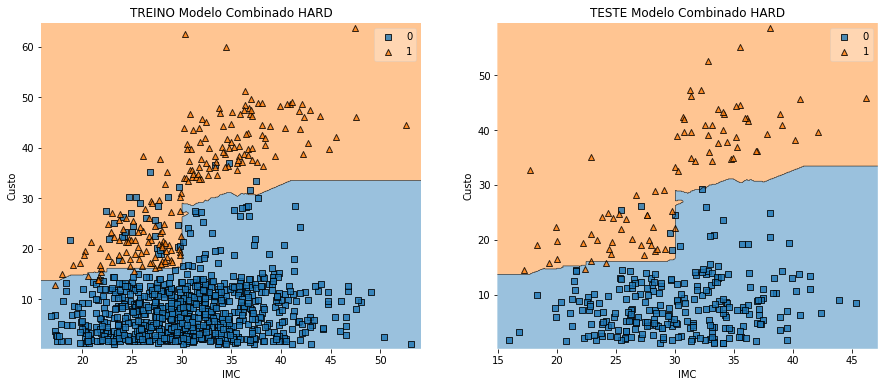

In [ ]:
# Gráfico de Decisão

from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size=0.25)
modelo.fit(Xtreino, ytreino)

plt.figure(figsize= (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend =1)
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.title('TREINO Modelo Combinado HARD')

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend=1)
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.title('TESTE Modelo Combinado HARD')

plt.show()

In [ ]:
# Combinação por Votos SOFT

from sklearn.ensemble import VotingClassifier

reglog = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 25)
arvore = DecisionTreeClassifier(max_depth = 3)

modelos = [('Reg. Log.', reglog), ('KNN', knn), ('Arvore', arvore)]

modelo = VotingClassifier(modelos, voting = 'soft')

medidas = cross_validate(modelo, X, y, cv = validacao, scoring= 'accuracy')
round(medidas['test_score'].mean(), 4)

0.9656

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names

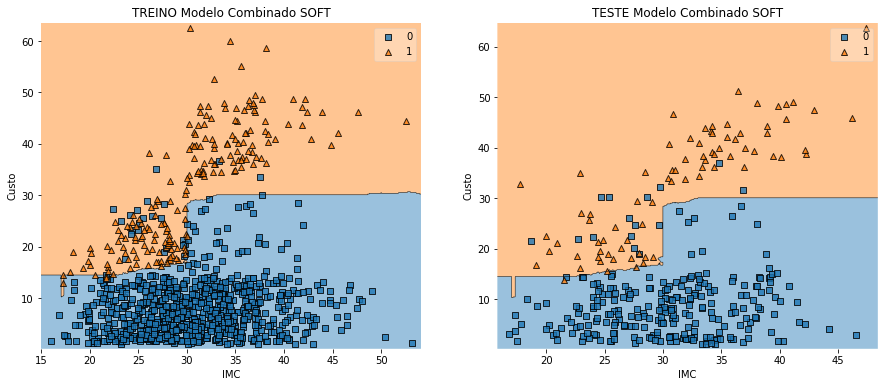

In [ ]:
# Grafico de Decisão 

Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size=0.25)
modelo.fit(Xtreino, ytreino) 

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend=1)
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.title('TREINO Modelo Combinado SOFT')

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend=1)
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.title('TESTE Modelo Combinado SOFT')

plt.show()